# Майнор по Анализу Данных
## Домашнее задание №4
## Деревья решений, случайный лес

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Classify leaf with random forest

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Помните [Iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)? Данные, с которыми вам предстоит работать в этом задании концептуально похожи на ирисы.

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

## Табличные данные

Загрузите файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [56]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [57]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [58]:
table_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8    ...      texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0    ...       0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0    ...       0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0    ...       0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0    ...       0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0    ...       0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить многомерный numpy массив

In [59]:
from sklearn.preprocessing import LabelEncoder
import random

In [60]:
random_seed =12345;

In [61]:
le=LabelEncoder()
le.fit(table_data.species);
labels=le.transform(table_data.species)
X=table_data.drop(['id','species'],axis=1).as_matrix()



array([[  7.81200000e-03,   2.34380000e-02,   2.34380000e-02,
          3.90600000e-03,   1.17190000e-02,   9.76600000e-03,
          2.73440000e-02,   0.00000000e+00,   1.95300000e-03,
          3.32030000e-02,   1.36720000e-02,   1.95310000e-02,
          6.64060000e-02,   0.00000000e+00,   2.92970000e-02,
          0.00000000e+00,   3.12500000e-02,   1.17190000e-02,
          0.00000000e+00,   2.53910000e-02,   2.34380000e-02,
          1.95300000e-03,   0.00000000e+00,   1.56250000e-02,
          0.00000000e+00,   3.12500000e-02,   0.00000000e+00,
          1.36720000e-02,   2.92970000e-02,   1.56250000e-02,
          1.17190000e-02,   3.90600000e-03,   2.53910000e-02,
          0.00000000e+00,   1.95300000e-03,   1.17190000e-02,
          9.76600000e-03,   4.10160000e-02,   3.71090000e-02,
          1.95310000e-02,   0.00000000e+00,   9.76600000e-03,
          2.14840000e-02,   1.56250000e-02,   7.81200000e-03,
          1.36720000e-02,   2.73440000e-02,   6.25000000e-02,
        

* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь.

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit


In [63]:

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_seed)
for train_index, test_index in sss.split(X,labels):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

## Сравнение RF, DT и Bagging'а (2 балла)

На кросс-валидации по обучающей выборке сравните качество и скорость
1. Обычного дерева решений 
2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями


* Изобразите полученные результаты на одном графике
* Используйте `StratifiedKFold` с 4 фолдами для оценки качества
* Мера качества - `accuracy`

In [64]:
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=4,random_state=random_seed)

for tr_index,val_index in kfold.split(X_train,y_train):
    x_tr,x_val=X_train[tr_index],X_train[val_index]
    y_tr,y_val=y_train[tr_index],y_train[val_index]

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
import time

log_cols=["Classifier", "Accuracy", "Time"]
log = pd.DataFrame(columns=log_cols)
classifiers10=[DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10),BaggingClassifier(n_estimators=10)]
classifiers50=[RandomForestClassifier(n_estimators=50),BaggingClassifier(n_estimators=50)]
classifiers100=[RandomForestClassifier(n_estimators=100),BaggingClassifier(n_estimators=100)]
classifiers200=[RandomForestClassifier(n_estimators=200),BaggingClassifier(n_estimators=200)]
classifiers300=[RandomForestClassifier(n_estimators=300),BaggingClassifier(n_estimators=300)]
print("===========10 trees===========")
for clf in classifiers10:
    startTime = time.time()
    clf.fit(x_tr,y_tr)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(x_val)
    acc=accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========50 trees===========")
for clf in classifiers50:
    startTime = time.time()
    clf.fit(x_tr,y_tr)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(x_val)
    acc=accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name+"50", acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========100 trees===========")
for clf in classifiers100:
    startTime = time.time()
    clf.fit(x_tr,y_tr)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(x_val)
    acc=accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name+"100", acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("\n===========200 trees===========")
for clf in classifiers200:
    startTime = time.time()
    clf.fit(x_tr,y_tr)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(x_val)
    acc=accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name+"200", acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========300 trees===========")
for clf in classifiers300:
    startTime = time.time()
    clf.fit(x_tr,y_tr)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(x_val)
    acc=accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name+"300", acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)

===========10 trees===========
DecisionTreeClassifier
*Results*
Accuracy: 59.0909%
Time: 0.3377
RandomForestClassifier
*Results*
Accuracy: 87.8788%
Time: 0.1563
BaggingClassifier
*Results*
Accuracy: 82.8283%
Time: 3.196

===========50 trees===========
RandomForestClassifier
*Results*
Accuracy: 97.4747%
Time: 0.6946
BaggingClassifier
*Results*
Accuracy: 91.9192%
Time: 12.79

===========100 trees===========
RandomForestClassifier
*Results*
Accuracy: 97.4747%
Time: 1.408
BaggingClassifier
*Results*
Accuracy: 94.9495%
Time: 26.07

===========200 trees===========
RandomForestClassifier
*Results*
Accuracy: 97.9798%
Time: 3.357
BaggingClassifier
*Results*
Accuracy: 92.9293%
Time: 54.23

===========300 trees===========
RandomForestClassifier
*Results*
Accuracy: 98.4848%
Time: 4.586
BaggingClassifier
*Results*
Accuracy: 94.4444%
Time: 79.34


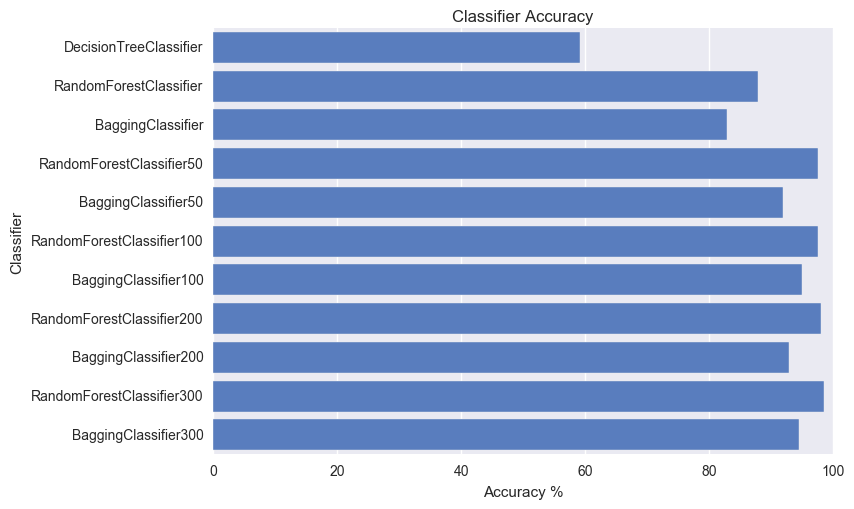

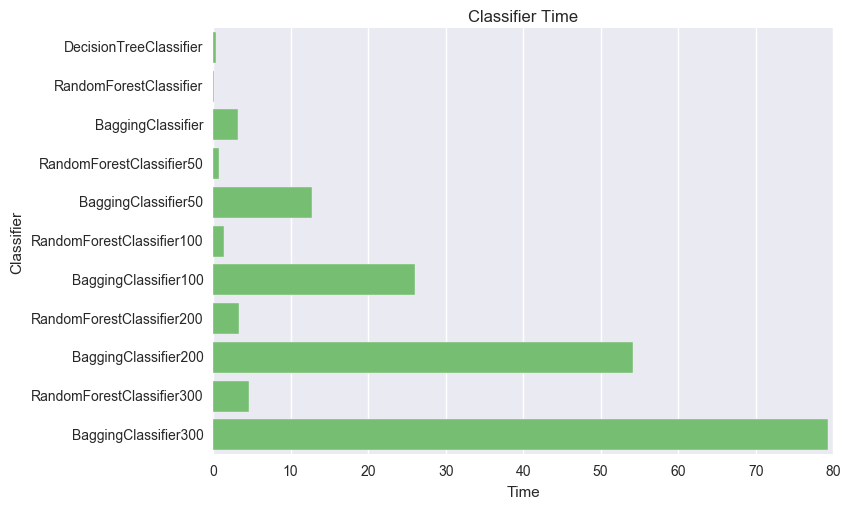

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Time', y='Classifier', data=log, color="g")

plt.xlabel('Time')
plt.title('Classifier Time')
plt.show()

# Изображения листьев

В папке `images` лежат 1584 изображения различного размера, названные в соответствии с id из файла `table_data.csv`.

## Загрузка изображений (1 балла)

Необходимо
1. "Стандартизировать" размер изображений - сделать его одинаковым для всех
2. Отобрать изображения тех листьев, которые представлены в `table_data`

Пункт 1. можно сделать двумя способами:
* C помощью функции scipy.misc.imresize (неидеальный вариант)
* Найти максимальные длинну и ширину полотна и перенести исходные картинки в центр (кажется, что так лучше)

В результате этого задания вы должны получить получить массив изображений IMG_train и IMG_test для обучающей и контрольной выборки.

In [89]:

from PIL import Image

def resize_image(image, new_height,new_width):
    image = image.resize((new_width, new_height),Image.ANTIALIAS)
    return np.array(image)

height = 400
width = 400
images = []
for img_id in table_data.id:
    path = os.path.join(IMG_DIR, str(img_id) + ".jpg")
    im=Image.open(path)
    images.append(resize_image(im,height,width))
    
 

In [90]:
IMG_train = np.array(images)[train_index]
IMG_test = np.array(images)[test_index]
np.set_printoptions(threshold=np.nan)
IMG_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

## TSNE (2 балла)

* Переформатируйте IMG_train и IMG_test к виду "матрица объект-признак" (команда reshape)
* На данных в X_train и IMG_train (по отдельности) изобразите результат применения T-SNE со следующими настройками: `n_components=2, perplexity=[5,10,20,30,50], method='exact', n_iter=5000, learning_rate=500`. 
* У вас должно получится 10 `scatter-plot` графиков с точками, расскашенными в цвет своего класса (для наглядности в `plt.scatter` укажите `cmap=plt.cm.Paired`)
* В каком случае (X_train или IMG_train) кластеры выделяются лучше? Как вы думаете, почему?


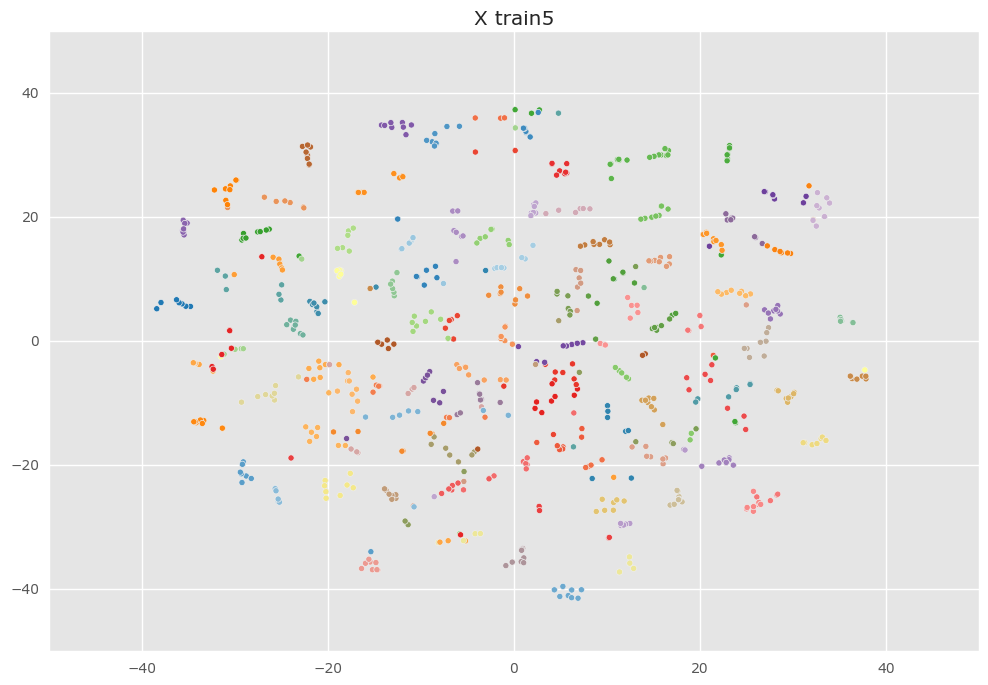

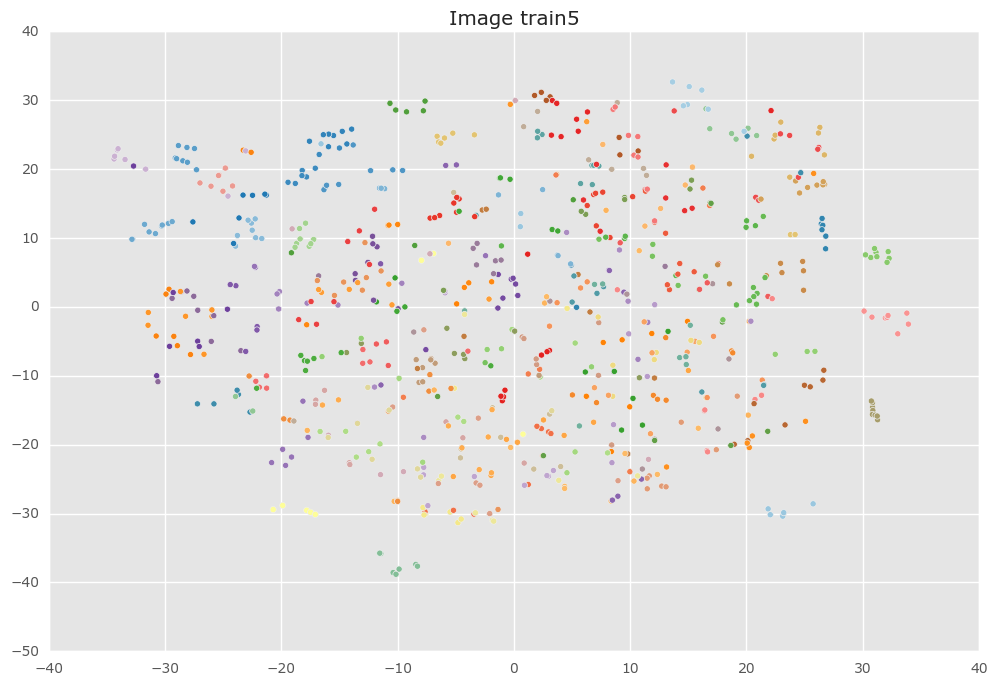

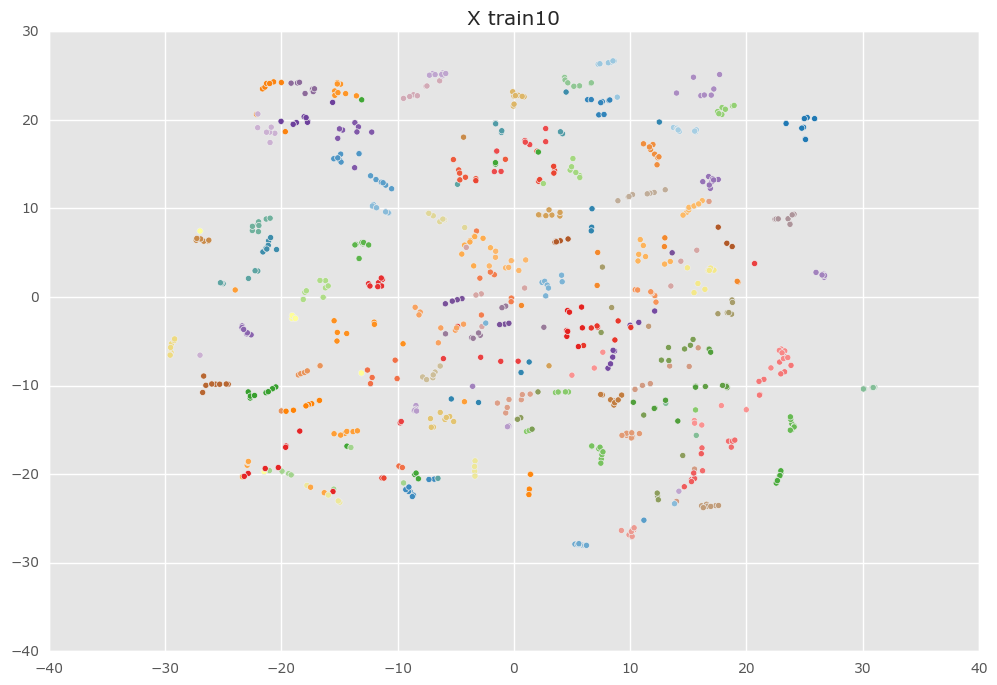

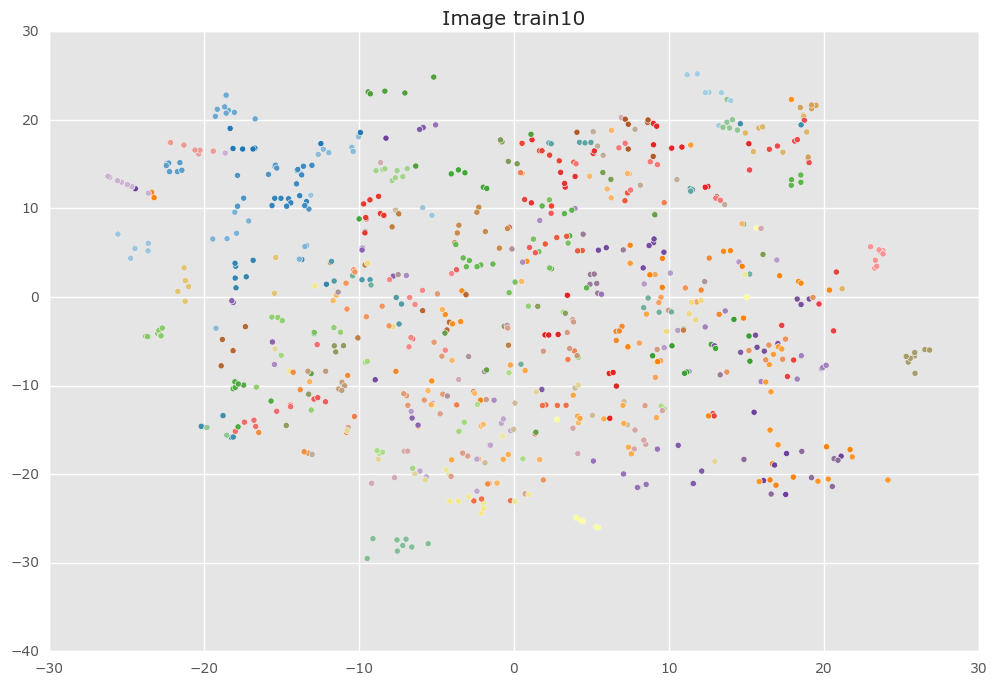

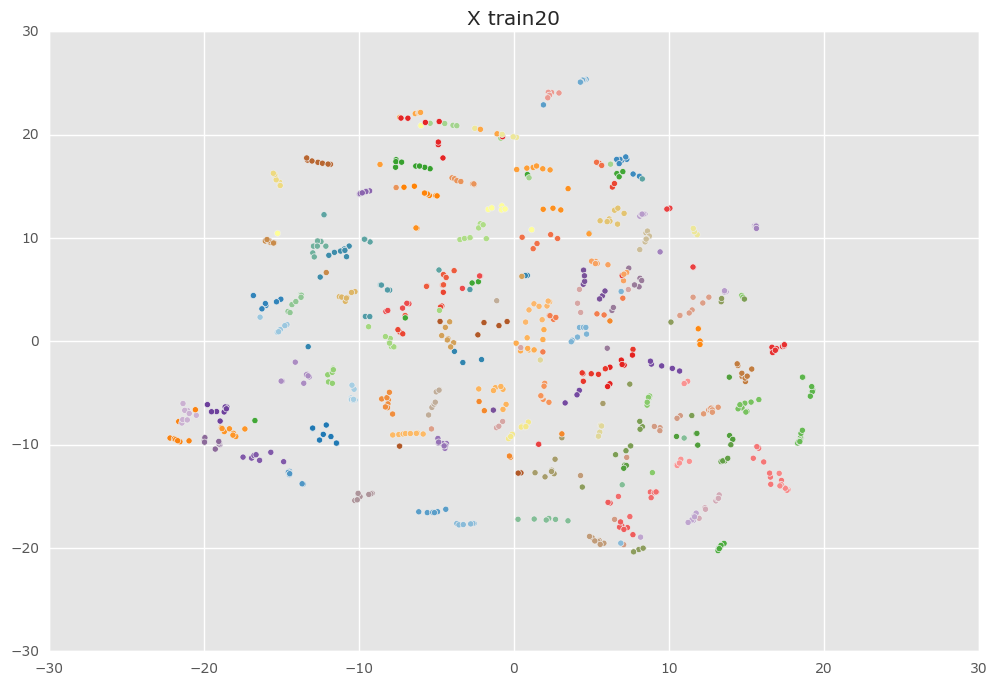

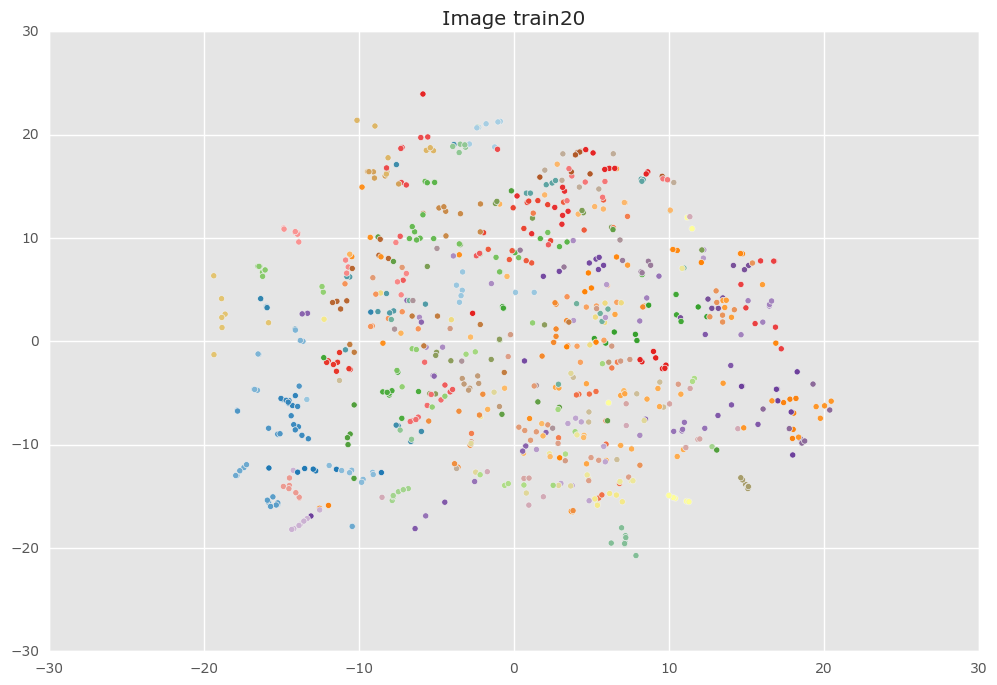

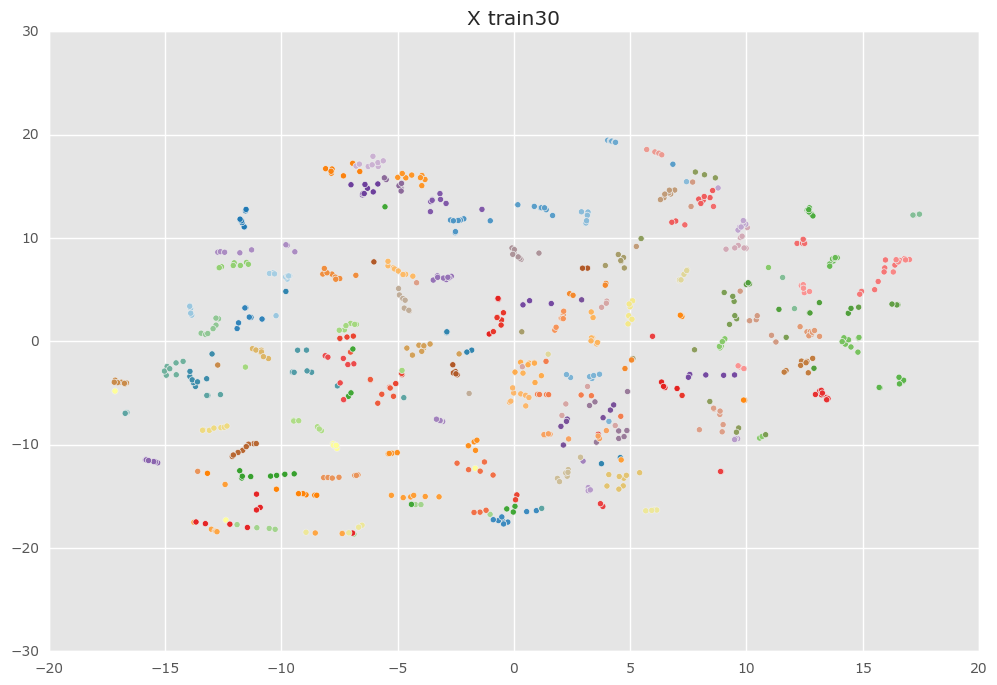

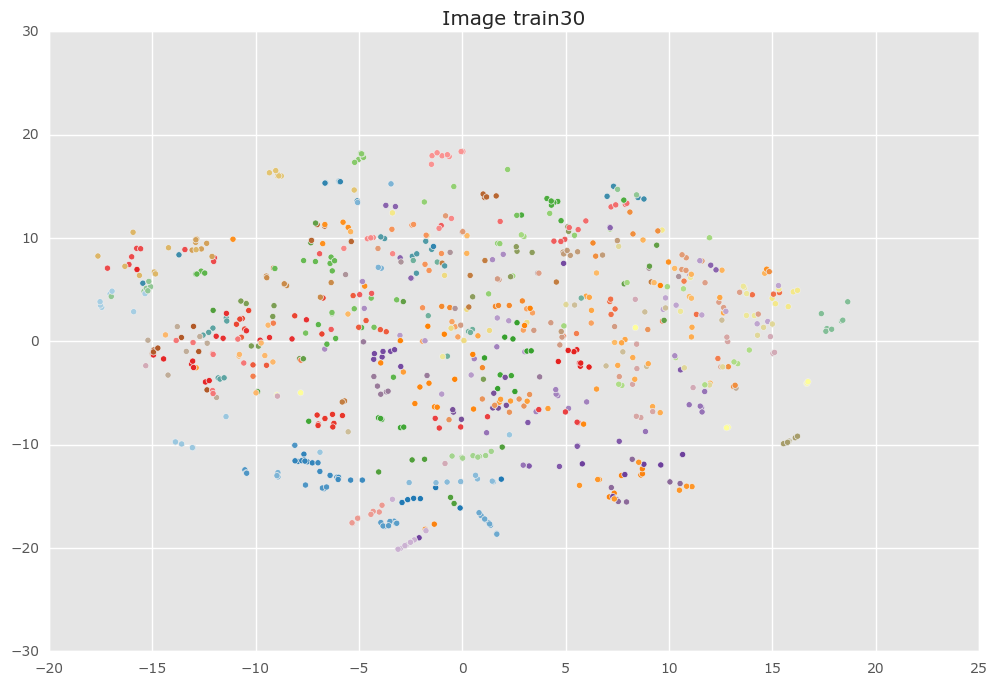

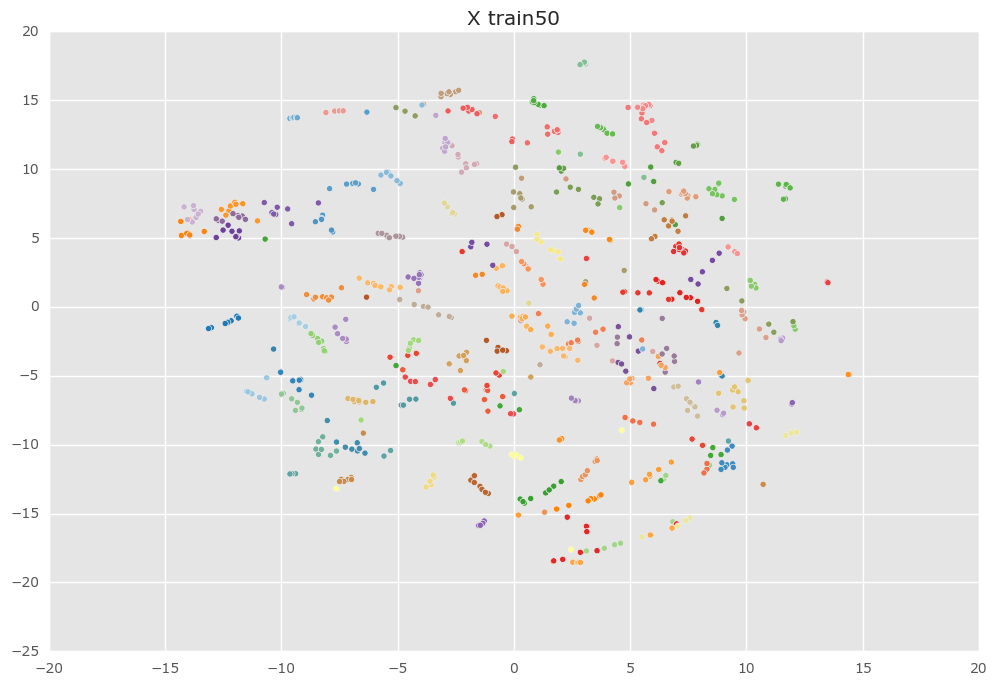

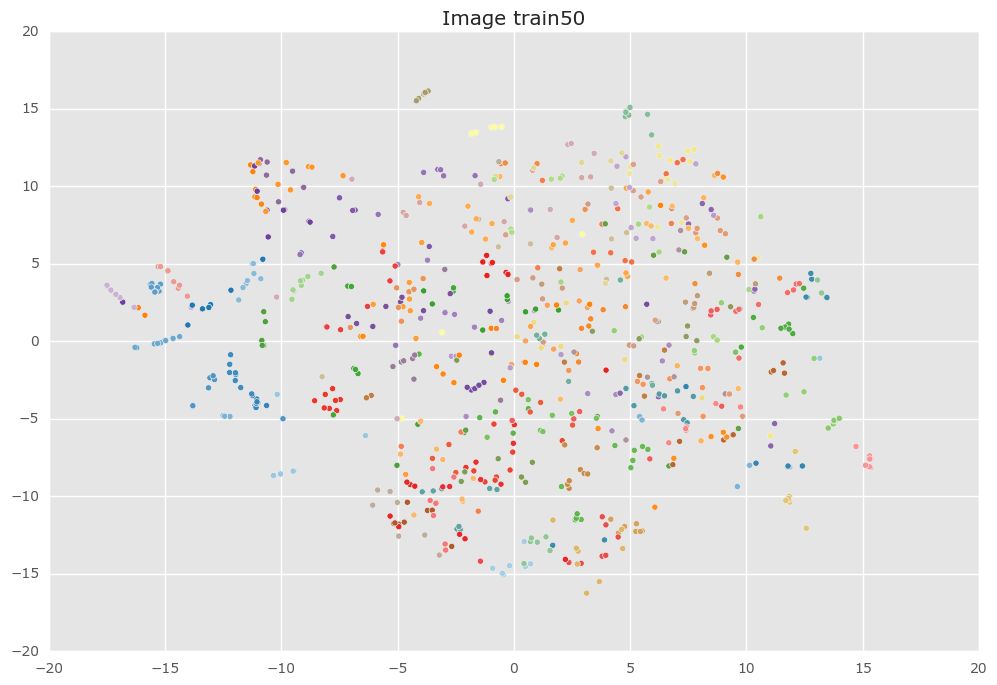

In [91]:
import sklearn
IMG_train = IMG_train.reshape(len(IMG_train), IMG_train.shape[1] * IMG_train.shape[2]) 
IMG_test = IMG_test.reshape(len(IMG_test), IMG_test.shape[1] * IMG_test.shape[2])
perplexitys=[5,10,20,30,50]
met='exact'
n_it,rate=5000,500
for per in perplexitys:
    t_sne=sklearn.manifold.TSNE(n_components=2,perplexity=per,method=met,n_iter=n_it,learning_rate=rate,random_state=random_seed)
    x_tr=t_sne.fit_transform(X_train)
    img_tr=t_sne.fit_transform(IMG_train)
    plt.figure() 
    plt.title('X train' + str(per)) 
    plt.scatter(x_tr[:,0], x_tr[:,1], c = y_train, cmap=plt.cm.Paired) 
    plt.figure() 
    plt.title('Image train' + str(per)) 
    plt.scatter(img_tr[:,0], img_tr[:,1], c = y_train, cmap=plt.cm.Paired)
# Табличные данные более точные (X train) и из-за этого кластеры выделяются лучше и находятся на большем расстоянии от друг друга
# А при данных с изображений кластеры выделяются намного хуже и находятся более в разнобой, так как количество признаков для
#изображений возрастает по сравнению с их количеством для табличных данных

## PCA (1 балл)

* Используйте метод главных компонент, чтобы перейти к пространству меньшей размерности. Подберите количество компонент так, чтобы доля объясненной дисперсии составляла 60%
* Используя результаты МГК на кросс-валидации сравните качество
    1. Обычного дерева решений 
    2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
    3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями
    
#### Hint
Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) из PCA и предиктивной модели

In [99]:
from sklearn.decomposition import PCA
variance_fraction=0.6
count=0
smallest_diference=1.0

for com in range(1,30):
    pca=PCA(n_components=com,random_state=random_seed)
    pca.fit_transform(IMG_train)
    variance=pca.explained_variance_ratio_.sum()
    difference=np.abs(variance-variance_fraction)
    if(difference<smallest_diference):
        count=com
        smallest_diference=difference
        best_PCA=pca
count

16

In [101]:
from sklearn.pipeline import Pipeline
decision_clf = Pipeline([('pca', best_PCA), ('dec',DecisionTreeClassifier(random_state=random_seed))])
random_forest_clf10 = Pipeline([('pca', best_PCA), ('rand',RandomForestClassifier(n_estimators=10,random_state=random_seed))])
bagging_clf10 = Pipeline([('pca', best_PCA), ('bag',BaggingClassifier(n_estimators=10,random_state=random_seed))])
random_forest_clf50 = Pipeline([('pca', best_PCA), ('rand',RandomForestClassifier(n_estimators=50,random_state=random_seed))])
bagging_clf50 = Pipeline([('pca', best_PCA), ('bag',BaggingClassifier(n_estimators=50,random_state=random_seed))])
random_forest_clf100 = Pipeline([('pca', best_PCA), ('rand',RandomForestClassifier(n_estimators=100,random_state=random_seed))])
bagging_clf100 = Pipeline([('pca', best_PCA), ('bag',BaggingClassifier(n_estimators=100,random_state=random_seed))])
random_forest_clf200 = Pipeline([('pca', best_PCA), ('rand',RandomForestClassifier(n_estimators=200,random_state=random_seed))])
bagging_clf200 = Pipeline([('pca', best_PCA), ('bag',BaggingClassifier(n_estimators=200,random_state=random_seed))])
random_forest_clf300 = Pipeline([('pca', best_PCA), ('rand',RandomForestClassifier(n_estimators=300,random_state=random_seed))])
bagging_clf300 = Pipeline([('pca', best_PCA), ('bag',BaggingClassifier(n_estimators=300,random_state=random_seed))])

In [103]:
for tr_index,val_index in kfold.split(IMG_train,y_train):
    img_tr2,img_val2=IMG_train[tr_index],IMG_train[val_index]
    y_tr2,y_val2=y_train[tr_index],y_train[val_index]

In [119]:


log_cols=["Classifier", "Accuracy", "Time"]
log = pd.DataFrame(columns=log_cols)
classifiers10=[decision_clf,random_forest_clf10,bagging_clf10]
classifiers50=[random_forest_clf50,bagging_clf50]
classifiers100=[random_forest_clf100,bagging_clf100]
classifiers200=[random_forest_clf200,bagging_clf200]
classifiers300=[random_forest_clf300,bagging_clf300]
count_f=0
print("===========10 trees===========")
for clf in classifiers10:
    startTime = time.time()
    clf.fit(img_tr2,y_tr2)
    if count_f==0:
        name = "DesicionTree clf"
        count_f=count_f+1
    elif count_f==1:
        name="Random Forest clf 10"
        count_f=count_f+1
    elif count_f==2:
        name="Bagging clf 10"
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(img_val2)
    acc=accuracy_score(y_val2, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========50 trees===========")
count=1
for clf in classifiers50:
    startTime = time.time()
    clf.fit(img_tr2,y_tr2)
    if count==1:
        name="Random Forest clf 50"
        count=count+1
    else:
        name="Bagging clf 50"
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(img_val2)
    acc=accuracy_score(y_val2, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========100 trees===========")
count=1
for clf in classifiers100:
    startTime = time.time()
    clf.fit(img_tr2,y_tr2)
    if count==1:
        name="Random Forest clf 100"
        count=count+1
    else:
        name="Bagging clf 100"
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(img_val2)
    acc=accuracy_score(y_val2, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
count=1 
print("\n===========200 trees===========")
for clf in classifiers200:
    startTime = time.time()
    clf.fit(img_tr2,y_tr2)
    if count==1:
        name="Random Forest clf 200"
        count=count+1
    else:
        name="Bagging clf 200"
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(img_val2)
    acc=accuracy_score(y_val2, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)
    
print("\n===========300 trees===========")
count=1
for clf in classifiers300:
    startTime = time.time()
    clf.fit(img_tr2,y_tr2)
    if count==1:
        name="Random Forest clf 300"
        count=count+1
    else:
        name="Bagging clf 300"
    print("="*30)
    print(name)
    print('*Results*')
    train_predictions=clf.predict(img_val2)
    acc=accuracy_score(y_val2, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    elapsedTime = time.time() - startTime
    print("Time: {:.4}".format(elapsedTime))
    log_entry = pd.DataFrame([[name, acc*100, elapsedTime]], columns=log_cols)
    log = log.append(log_entry)

===========10 trees===========
DesicionTree clf
*Results*
Accuracy: 27.2727%
Time: 10.32
Random Forest clf 10
*Results*
Accuracy: 35.3535%
Time: 8.422
Bagging clf 10
*Results*
Accuracy: 33.8384%
Time: 8.327

===========50 trees===========
Random Forest clf 50
*Results*
Accuracy: 42.9293%
Time: 8.455
Bagging clf 50
*Results*
Accuracy: 42.4242%
Time: 9.34

===========100 trees===========
Random Forest clf 100
*Results*
Accuracy: 43.9394%
Time: 9.706
Bagging clf 100
*Results*
Accuracy: 44.9495%
Time: 12.03

===========200 trees===========
Random Forest clf 200
*Results*
Accuracy: 44.9495%
Time: 11.0
Bagging clf 200
*Results*
Accuracy: 43.9394%
Time: 13.77

===========300 trees===========
Random Forest clf 300
*Results*
Accuracy: 43.9394%
Time: 12.28
Bagging clf 300
*Results*
Accuracy: 45.4545%
Time: 17.02


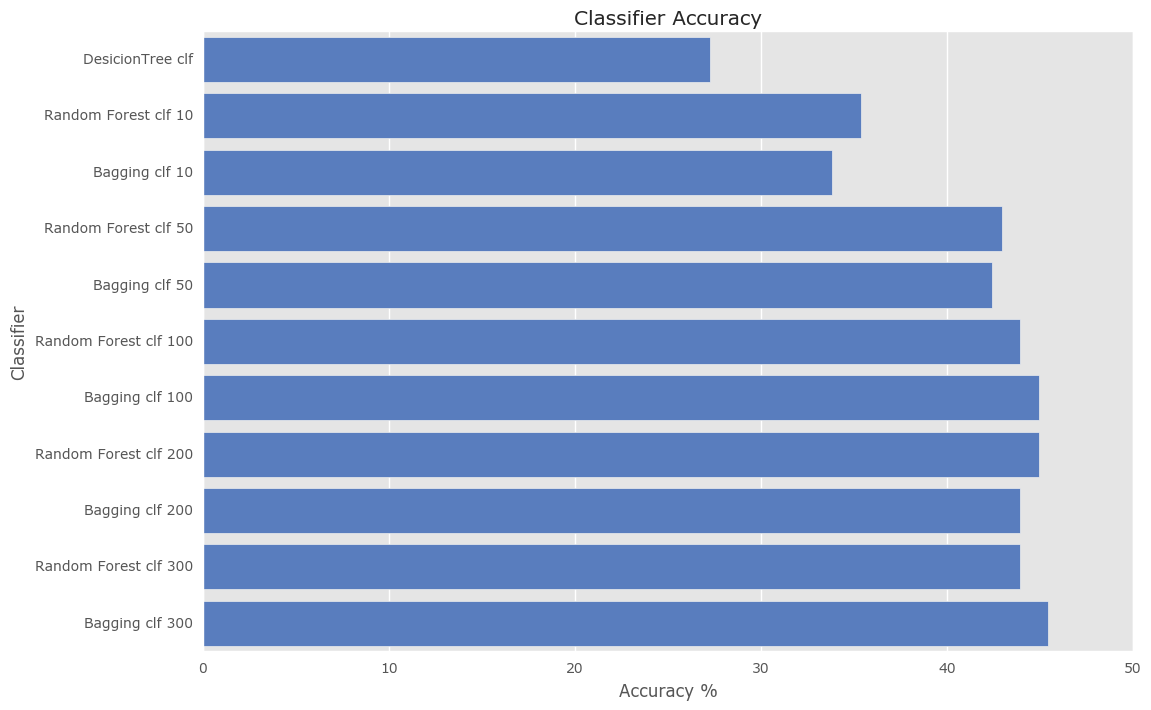

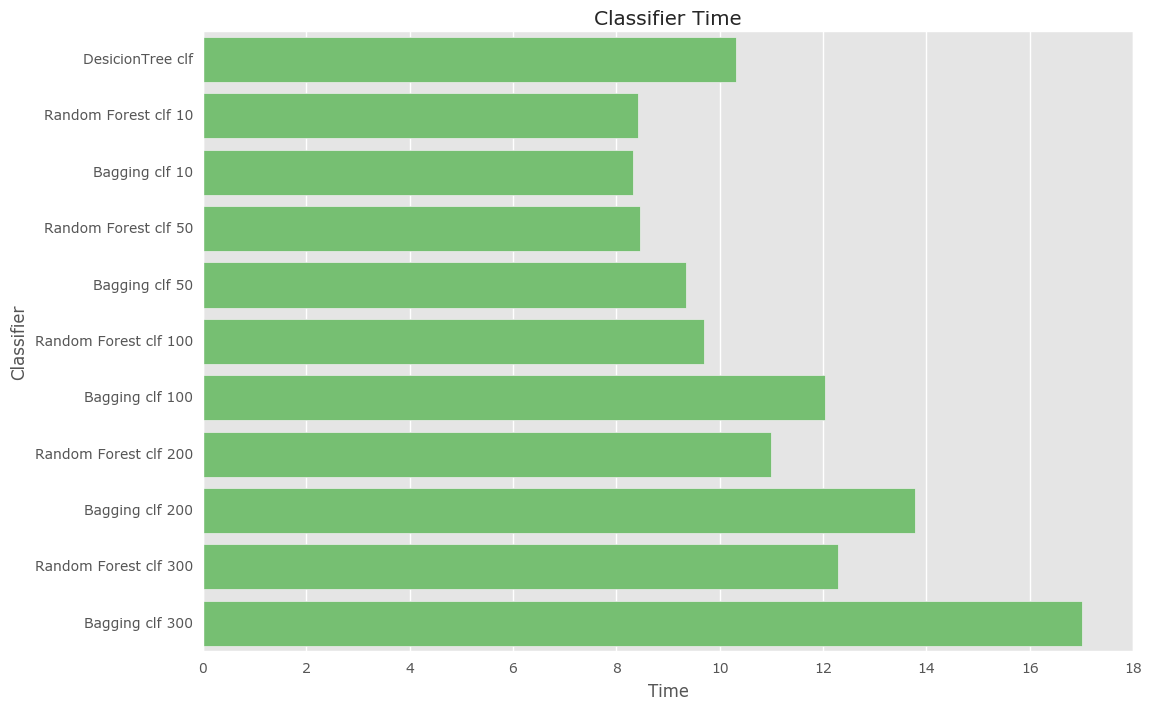

In [120]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Time', y='Classifier', data=log, color="g")

plt.xlabel('Time')
plt.title('Classifier Time')
plt.show()

# Подбор гиперпараметров модели на табличных данных (2 балла)

С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах
* Мера качества - `accuracy`

In [80]:
from sklearn.model_selection import RandomizedSearchCV
param_dist={ "max_features": [1, 2, 3],"n_estimators":[50,100,200,300],  "min_samples_split": [2, 3,4],
              "min_samples_leaf": [1, 2, 3],}
rf_hyperparams=RandomizedSearchCV(RandomForestClassifier(random_state=random_seed),param_distributions=param_dist,cv=StratifiedKFold(n_splits=4, random_state=random_seed), scoring = "accuracy")
rf_hyperparams.fit(X_train,y_train)
print("Best parametres:")
rf_hyperparams.best_params_

Best parametres:


{'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

# Проверка на контрольной выборке (1 балл)

* Примените оптимальную модель на контрольной выборке
* Для нескольких случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса

In [121]:
pred=rf_hyperparams.predict(X_test)
table_data.loc[test_index].loc[y_test!=pred]

id                       species   margin1   margin2   margin3  \
578   918        Quercus_Infectoria_sub  0.017578  0.027344  0.033203   
905  1454              Quercus_Kewensis  0.001953  0.001953  0.044922   
138   245             Quercus_Pubescens  0.001953  0.001953  0.031250   
206   350           Quercus_x_Hispanica  0.013672  0.009766  0.019531   
338   556  Viburnum_x_Rhytidophylloides  0.023438  0.029297  0.007812   

      margin4   margin5   margin6   margin7   margin8    ...      texture55  \
578  0.007812  0.003906  0.033203  0.029297  0.000000    ...       0.105470   
905  0.039062  0.011719  0.001953  0.037109  0.005859    ...       0.019531   
138  0.058594  0.011719  0.003906  0.042969  0.000000    ...       0.000000   
206  0.035156  0.007812  0.007812  0.023438  0.000000    ...       0.000000   
338  0.044922  0.009766  0.029297  0.035156  0.000000    ...       0.000000   

     texture56  texture57  texture58  texture59  texture60  texture61  \
578        0.0   0.059570   0.000000   0.002930   0.000000        0.0   
905        0.0   0.064453   0.000000   0.005859   0.000000        0.0   
138        0.0   0.000000   0.000977   0.030273   0.000000        0.0   
206        0.0   0.000977   0.000977   0.012695   0.000977        0.0   
338        0.0   0.000000   0.067383   0.000000   0.032227        0.0   

     texture62  texture63  texture64  
578   0.000000   0.019531   0.046875  
905   0.000000   0.051758   0.063477  
138   0.000000   0.000000   0.000000  
206   0.003906   0.050781   0.025391  
338   0.106450   0.021484   0.000000  

[5 rows x 194 columns]

In [122]:
pred[y_test!=pred]

array([84, 68, 92, 68, 27], dtype=int64)

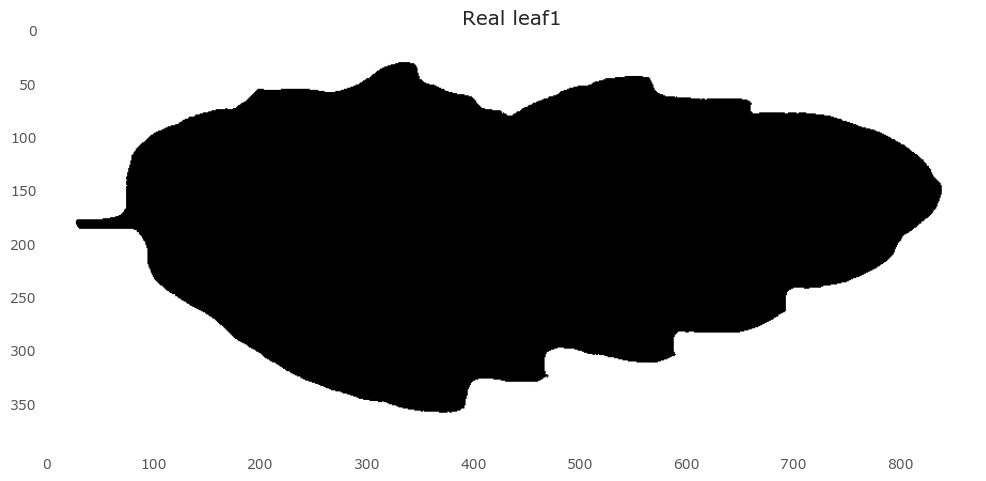

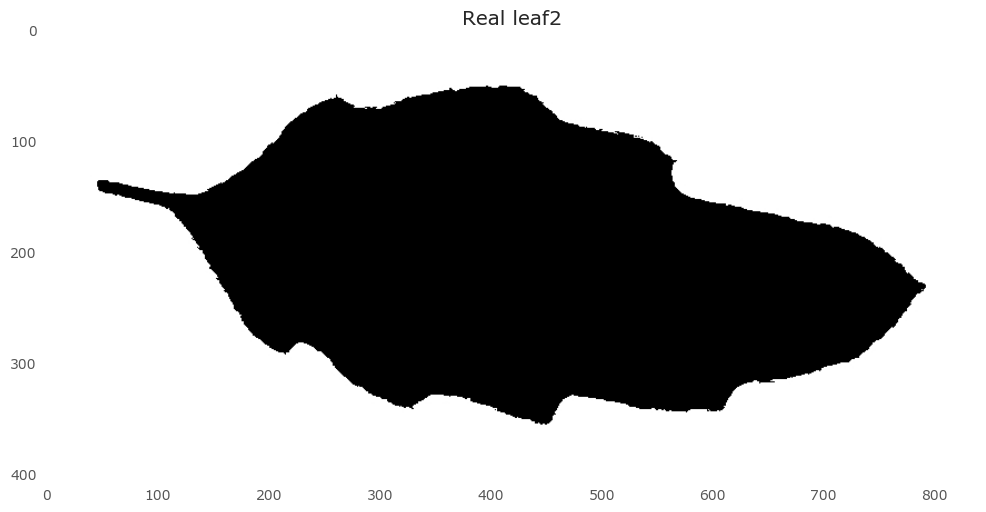

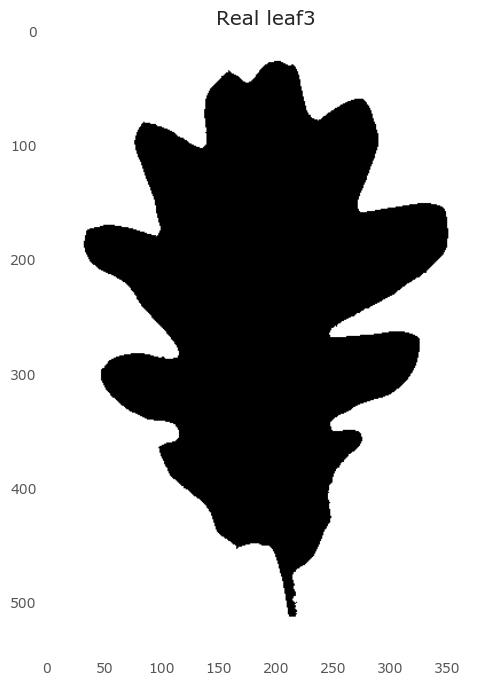

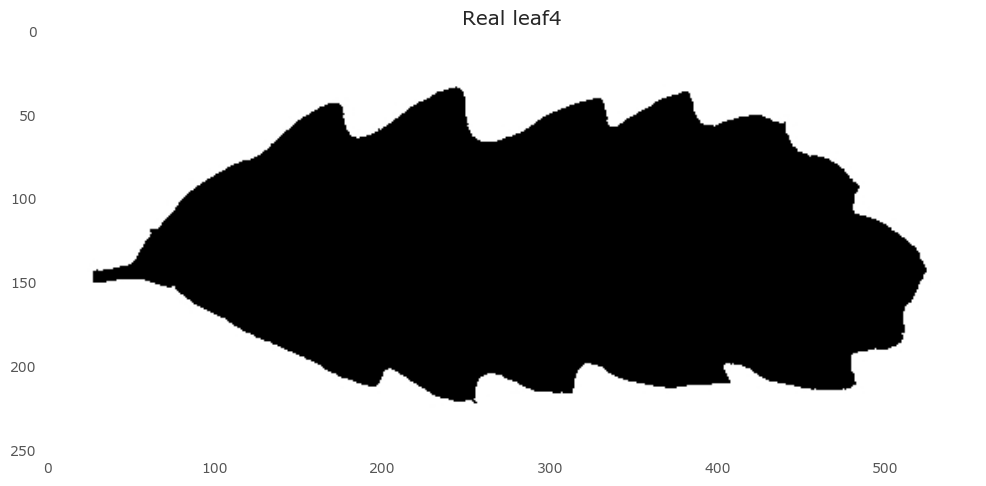

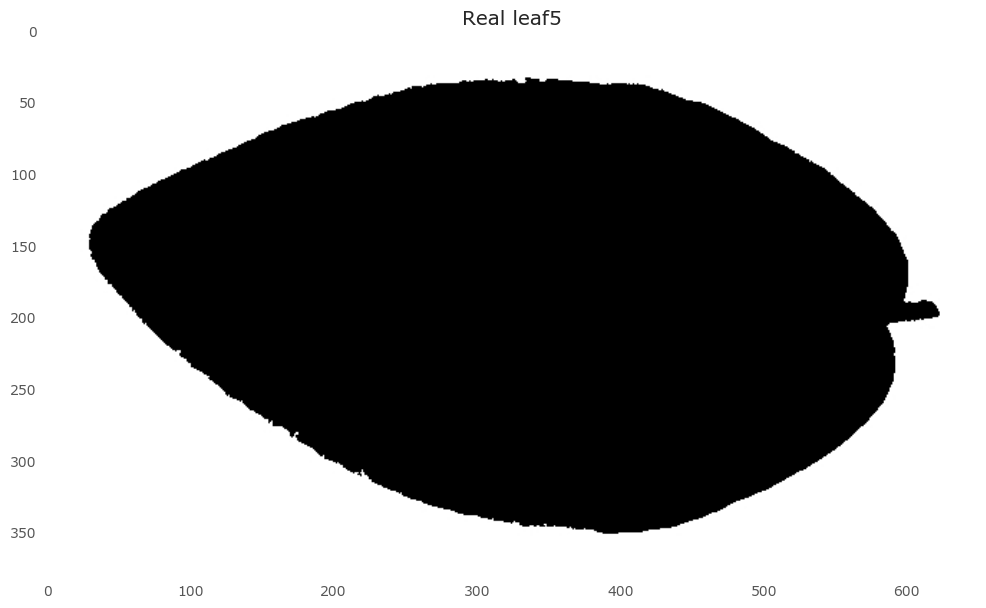

In [127]:

l1=plt.imread(os.path.join(IMG_DIR, '918.jpg'))
l2=plt.imread(os.path.join(IMG_DIR, '1454.jpg'))
l3=plt.imread(os.path.join(IMG_DIR, '245.jpg'))
l4=plt.imread(os.path.join(IMG_DIR, '350.jpg'))
l5=plt.imread(os.path.join(IMG_DIR, '556.jpg'))
plt.figure()
plt.imshow(l1, cmap = 'Greys')
plt.grid(False)
plt.title('Real leaf1')
plt.figure()
plt.imshow(l2, cmap = 'Greys')
plt.grid(False)
plt.title('Real leaf2')
plt.figure()
plt.imshow(l3, cmap = 'Greys')
plt.grid(False)
plt.title('Real leaf3')
plt.figure()
plt.imshow(l4, cmap = 'Greys')
plt.grid(False)
plt.title('Real leaf4')
plt.figure()
plt.imshow(l5, cmap = 'Greys')
plt.grid(False)
plt.title('Real leaf5')
    

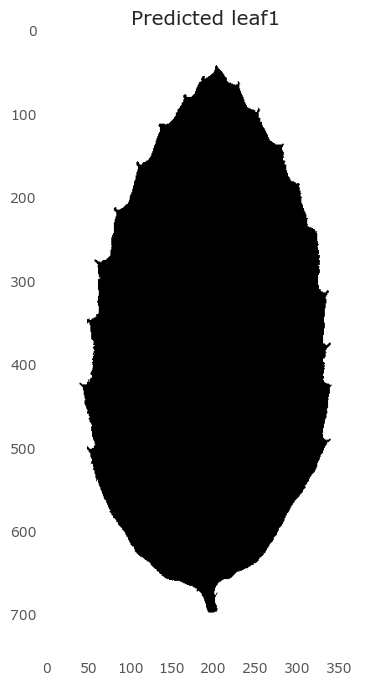

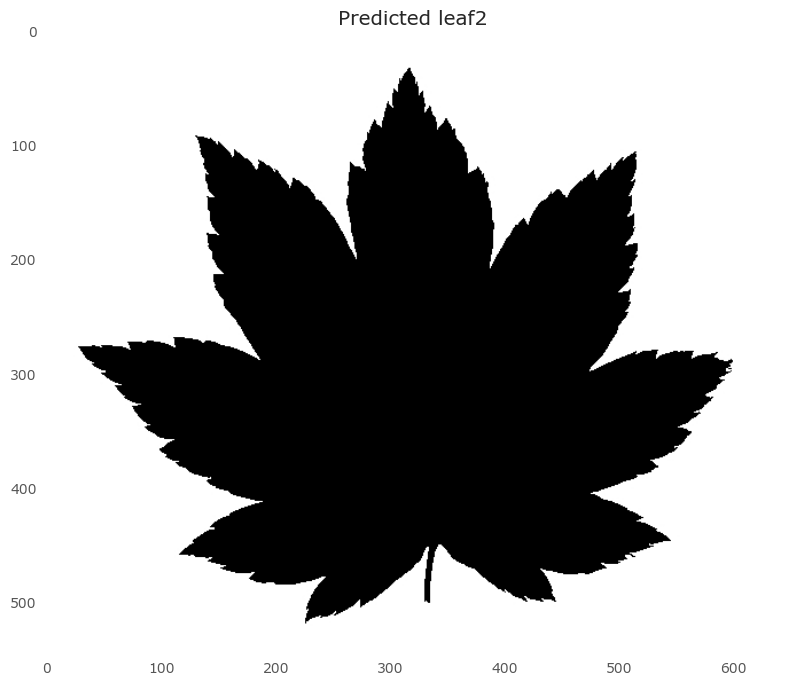

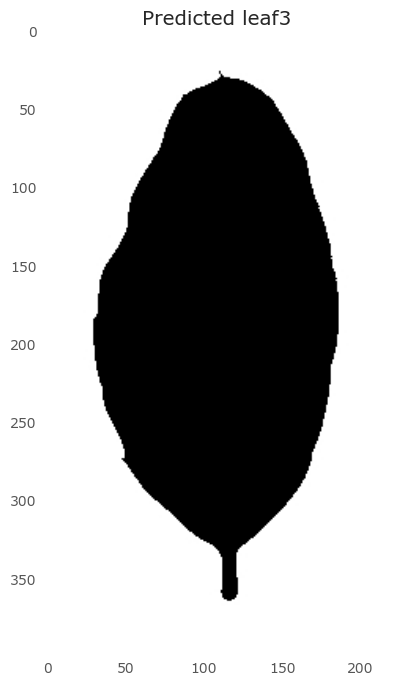

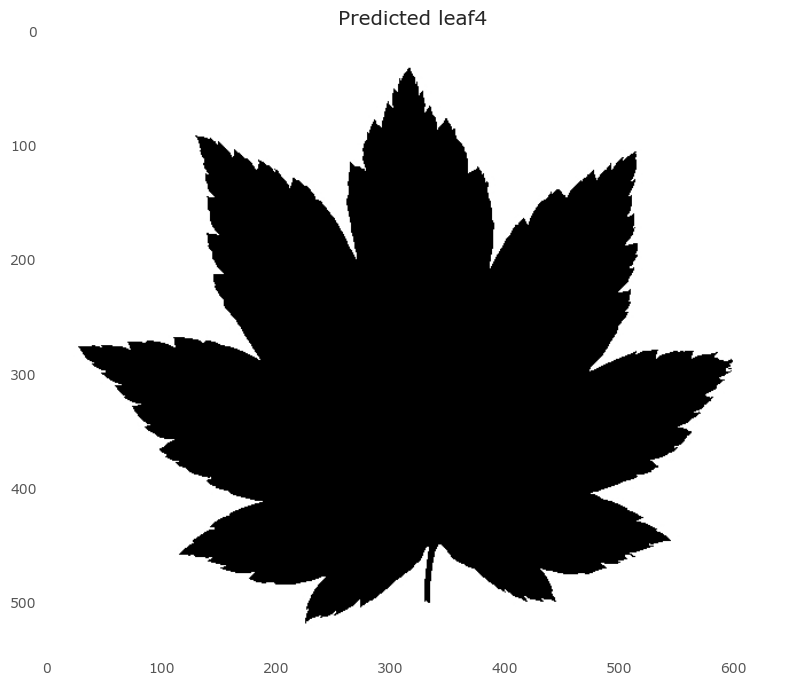

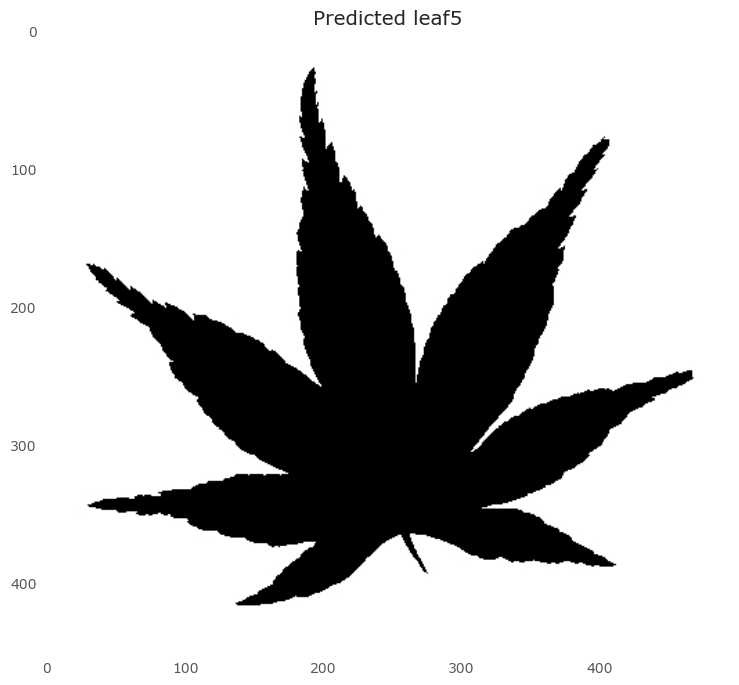

In [128]:
#array([84, 68, 92, 68, 27], dtype=int64)
l1=plt.imread(os.path.join(IMG_DIR, '84.jpg'))
l2=plt.imread(os.path.join(IMG_DIR, '68.jpg'))
l3=plt.imread(os.path.join(IMG_DIR, '92.jpg'))
l4=plt.imread(os.path.join(IMG_DIR, '68.jpg'))
l5=plt.imread(os.path.join(IMG_DIR, '27.jpg'))
plt.figure()
plt.imshow(l1, cmap = 'Greys')
plt.grid(False)
plt.title('Predicted leaf1')
plt.figure()
plt.imshow(l2, cmap = 'Greys')
plt.grid(False)
plt.title('Predicted leaf2')
plt.figure()
plt.imshow(l3, cmap = 'Greys')
plt.grid(False)
plt.title('Predicted leaf3')
plt.figure()
plt.imshow(l4, cmap = 'Greys')
plt.grid(False)
plt.title('Predicted leaf4')
plt.figure()
plt.imshow(l5, cmap = 'Greys')
plt.grid(False)
plt.title('Predicted leaf5')

In [129]:
print("The best accuracy: %f" % accuracy_score(y_test, pred))

The best accuracy: 0.974747
